<a href="https://colab.research.google.com/github/haima2209/ML-project/blob/main/IRISFlowerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IRIS FLOWER CLASSIFICATION**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
iris_data=pd.read_csv('/content/bezdekIris.csv')
iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

PREPROCESSING OF DATASET

In [10]:
iris_data.isnull()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


EXPLORATORY DATA ANALYSIS

<Axes: >

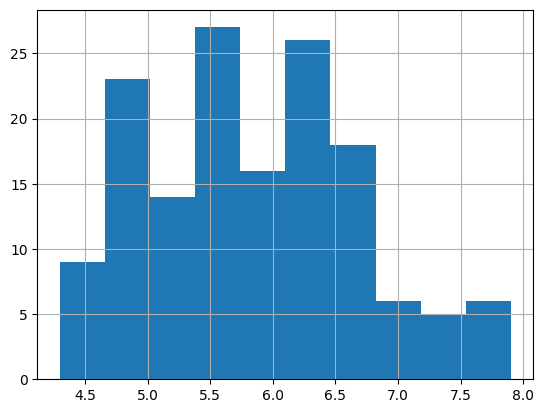

In [11]:
iris_data['SepalLength'].hist()

<Axes: >

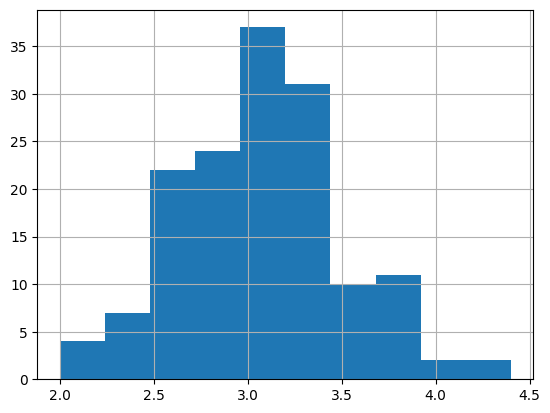

In [12]:
iris_data['SepalWidth'].hist()

<Axes: >

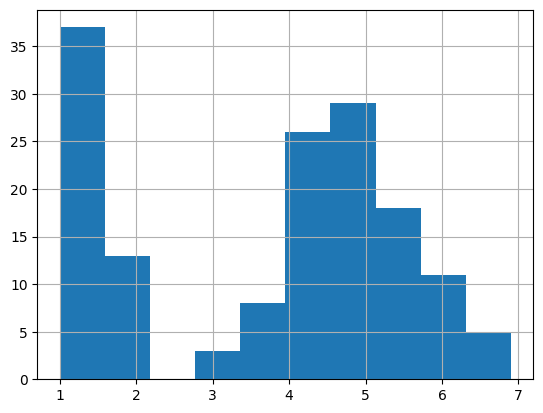

In [13]:
iris_data['PetalLength'].hist()

<Axes: >

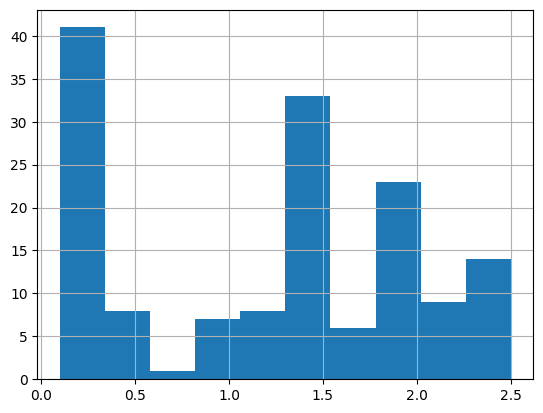

In [14]:
iris_data['PetalWidth'].hist()

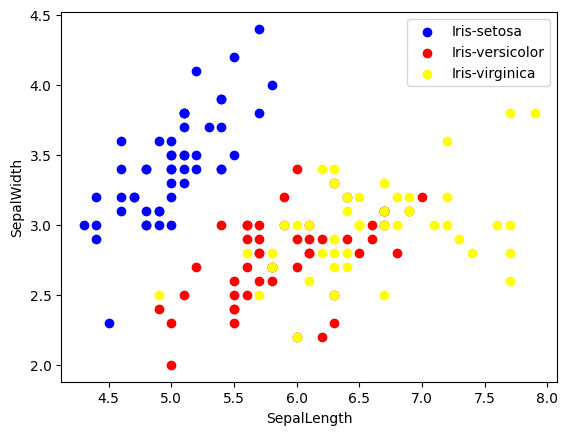

In [21]:
#SCATTER PLOT
colour=['blue','red','yellow']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
  n=iris_data[iris_data['Species']==species[i]]
  plt.scatter(n['SepalLength'],n['SepalWidth'],c=colour[i],label=species[i])
  plt.xlabel('SepalLength')
  plt.ylabel('SepalWidth')
  plt.legend()


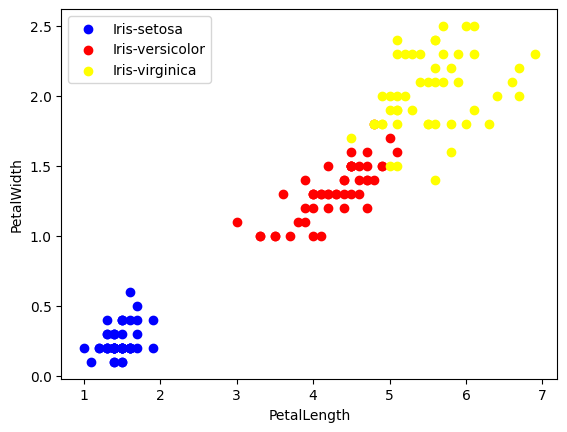

In [23]:
colour=['blue','red','yellow']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
  n=iris_data[iris_data['Species']==species[i]]
  plt.scatter(n['PetalLength'],n['PetalWidth'],c=colour[i],label=species[i])
  plt.xlabel('PetalLength')
  plt.ylabel('PetalWidth')
  plt.legend()

**CORRELATION MATRIX**

In [24]:
iris_data.corr()

<ipython-input-24-5c5a46e05691>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_data.corr()


,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.117570,0.871754,0.817941
SepalWidth,-0.117570,1.000000,-0.428440,-0.366126
PetalLength,0.871754,-0.428440,1.000000,0.962865
PetalWidth,0.817941,-0.366126,0.962865,1.000000


<ipython-input-28-bf7ab3f50f5f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=iris_data.corr()


<Axes: >

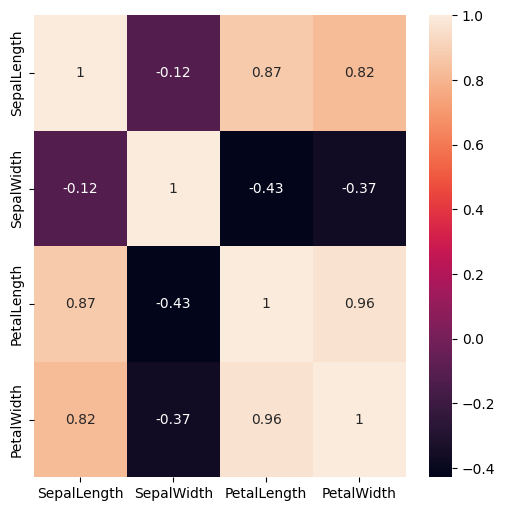

In [28]:
corr=iris_data.corr()
fig,ax=plt.subplots(figsize=(6,6))
sns.heatmap(corr,annot=True,ax=ax)

**ENCODING**

In [30]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [31]:
iris_data['Species']=l.fit_transform(iris_data['Species'])
iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**MODEL TRAINING**

In [33]:
from sklearn.model_selection import train_test_split
X=iris_data.drop(columns=['Species'])
Y=iris_data['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4)

**TESTING OF ACCURACY**

In [36]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
print('Accuracy:',model.score(x_test,y_test))

Accuracy: 0.9333333333333333


In [37]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
print('Accuracy:',model.score(x_test,y_test))

Accuracy: 0.9
